In [1]:
# Imports and defs
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# pd.set_option('display.float_format', lambda x: '%.5f' % x)

def get_extent(hist):
    x_min = hist[1][0]
    x_max = hist[1][-1]
    y_min = hist[2][0]
    y_max = hist[2][-1]
    return [x_min, x_max, y_min, y_max]

def stats(benchmark):
    # Plot
    hist = np.load(f'/traces/{benchmark}/histograms.npz', allow_pickle=True)
    fig, ax = plt.subplots(ncols=4, figsize=(25, 4))
    hb = ax[0].imshow(hist['time_addr'][0].T, cmap='hot', extent=get_extent(hist['time_addr']), aspect='auto')
    fig.colorbar(hb, ax=ax[0])
    hb = ax[1].imshow(hist['time_dt'][0].T, cmap='hot', extent=get_extent(hist['time_dt']), aspect='auto')
    fig.colorbar(hb, ax=ax[1])
    hb = ax[2].imshow(hist['time_addr_miss'][0].T, cmap='hot', extent=get_extent(hist['time_addr_miss']), aspect='auto')
    fig.colorbar(hb, ax=ax[2])
    hb = ax[3].imshow(hist['time_dt_miss'][0].T, cmap='hot', extent=get_extent(hist['time_dt_miss']), aspect='auto')
    fig.colorbar(hb, ax=ax[3])
    ax[0].set_xlabel('Access Number')
    ax[1].set_xlabel('Access Number')
    ax[2].set_xlabel('Access Number')
    ax[3].set_xlabel('Access Number')
    ax[0].set_ylabel('Address')
    ax[1].set_ylabel('Delta')
    ax[2].set_ylabel('Missed Address')
    ax[3].set_ylabel('Missed Delta')
    fig.suptitle(benchmark)
    # Stats CSV
    return pd.read_csv(f'/traces/{benchmark}/stats.csv', index_col=0)


,raw,miss
len,4.579842e+07,1819.00000
unique addr,2.877200e+04,1819.00000
unique deltas,3.291100e+04,1054.00000
rare deltas (< 10),7.000000e+00,1051.00000
unique deltas (no rare),3.290400e+04,3.00000
rare deltas fract,1.746785e-07,0.57779
deltas 50% mass,1.500000e+01,145.00000
deltas 50K coverage,1.000000e+00,1.00000


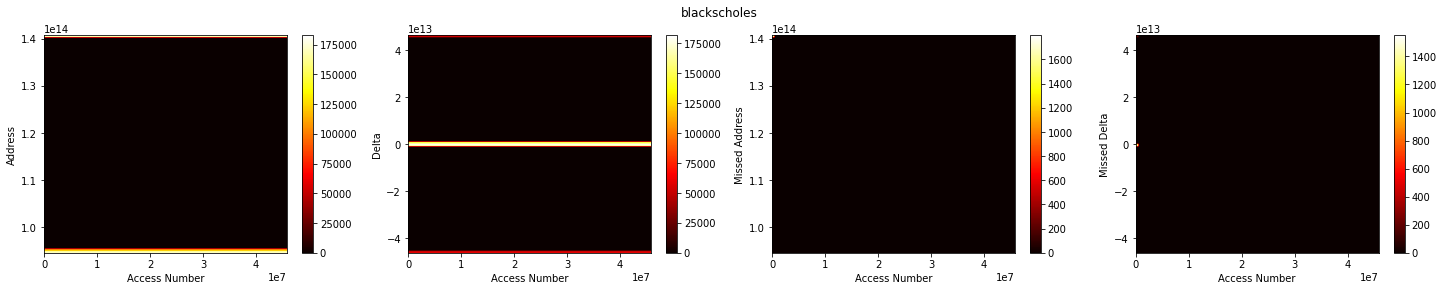

In [2]:
stats('blackscholes')

,raw,miss
len,2.006469e+08,78544.000000
unique addr,3.694464e+06,78544.000000
unique deltas,5.725802e+06,18232.000000
rare deltas (< 10),5.475119e+06,17701.000000
unique deltas (no rare),2.506830e+05,531.000000
rare deltas fract,9.041005e-02,0.245926
deltas 50% mass,1.700000e+01,3.000000
deltas 50K coverage,8.775615e-01,1.000000


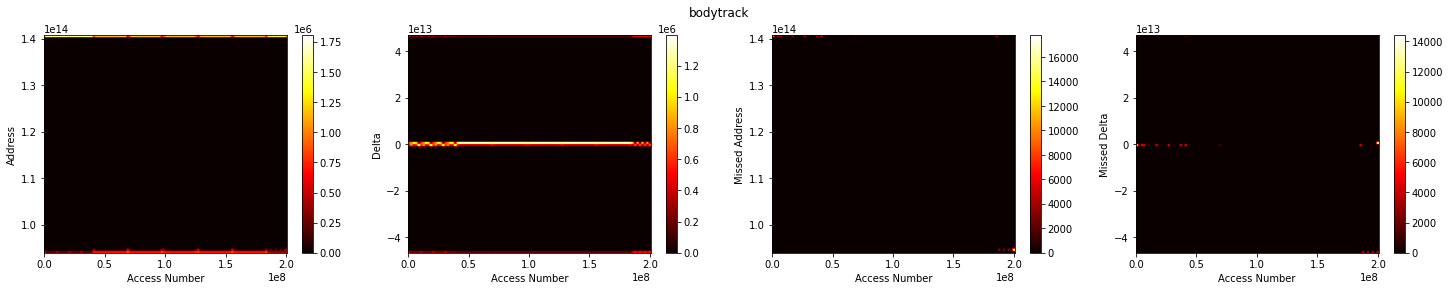

In [3]:
stats('bodytrack')

,raw,miss
len,7.152517e+07,567817.000000
unique addr,1.858297e+06,462932.000000
unique deltas,3.293233e+06,464845.000000
rare deltas (< 10),2.907729e+06,464840.000000
unique deltas (no rare),3.855040e+05,5.000000
rare deltas fract,1.552341e-01,0.985964
deltas 50% mass,1.800000e+01,180937.000000
deltas 50K coverage,7.767418e-01,0.200963


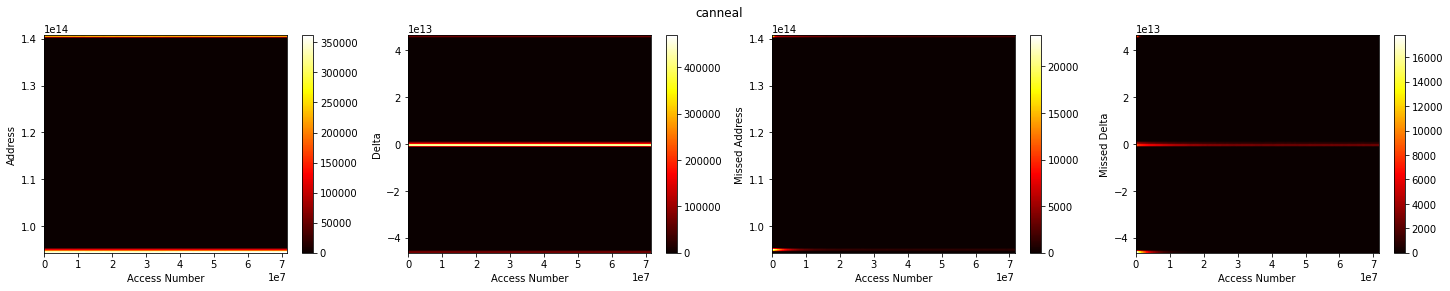

In [4]:
stats('canneal')

,raw,miss
len,9.106470e+08,353222.000000
unique addr,2.206505e+07,347444.000000
unique deltas,1.850590e+07,9740.000000
rare deltas (< 10),1.715642e+07,9611.000000
unique deltas (no rare),1.349479e+06,129.000000
rare deltas fract,3.662725e-02,0.036076
deltas 50% mass,1.700000e+01,2.000000
deltas 50K coverage,8.171564e-01,1.000000


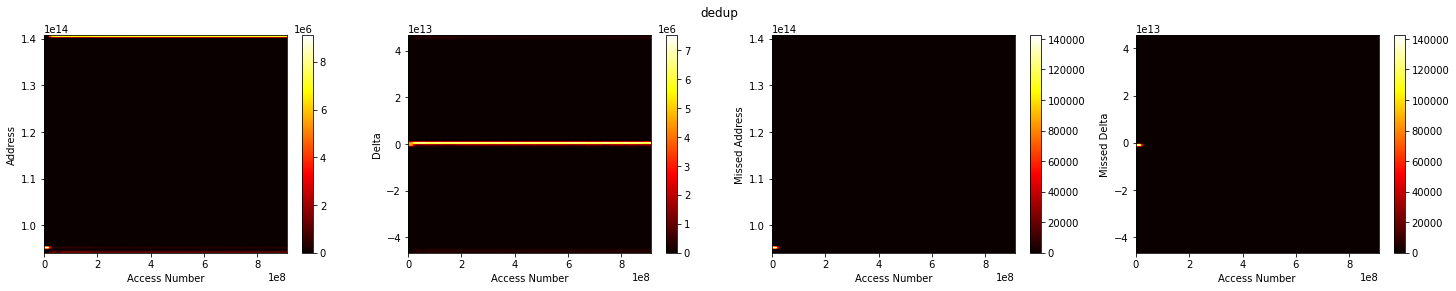

In [5]:
stats('dedup')

,raw,miss
len,1.000000e+09,3.342586e+06
unique addr,3.510524e+07,2.812646e+06
unique deltas,2.582071e+07,1.142986e+06
rare deltas (< 10),1.912708e+07,1.142885e+06
unique deltas (no rare),6.693625e+06,1.010000e+02
rare deltas fract,8.665210e-02,3.511219e-01
deltas 50% mass,3.400000e+01,2.000000e+00
deltas 50K coverage,8.059386e-01,6.730119e-01


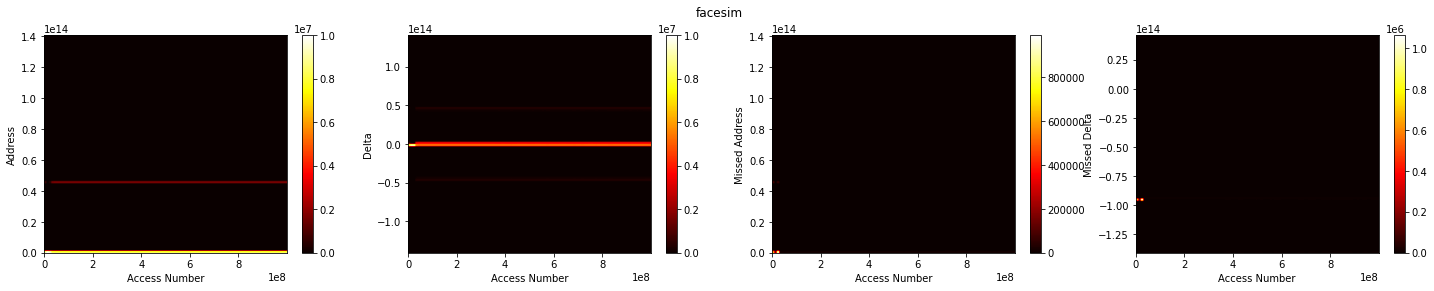

In [6]:
stats('facesim')

,raw,miss
len,8.205326e+08,124670.000000
unique addr,3.600432e+06,124670.000000
unique deltas,3.956570e+07,122558.000000
rare deltas (< 10),3.501513e+07,122540.000000
unique deltas (no rare),4.550565e+06,18.000000
rare deltas fract,1.005952e-01,0.992693
deltas 50% mass,8.290000e+02,60223.000000
deltas 50K coverage,7.279498e-01,0.418000


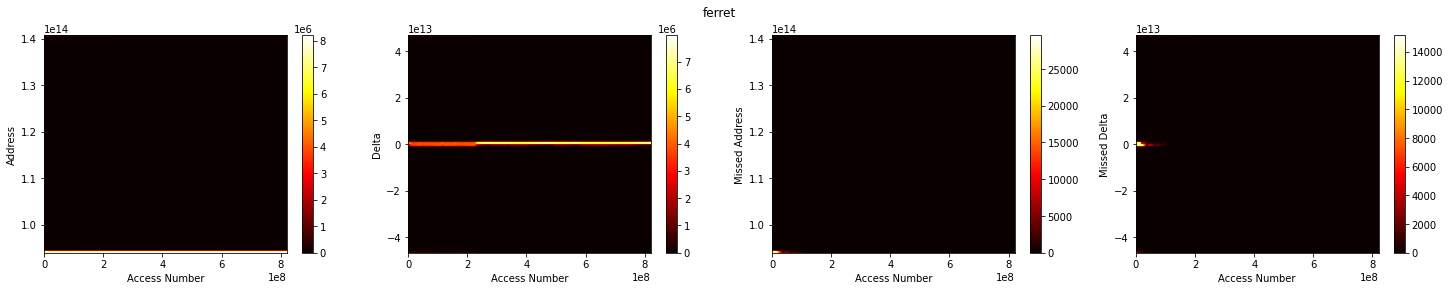

In [7]:
stats('ferret')

,raw,miss
len,3.037450e+08,173260.000000
unique addr,1.442013e+06,173260.000000
unique deltas,2.921894e+06,99117.000000
rare deltas (< 10),2.306320e+06,99047.000000
unique deltas (no rare),6.155740e+05,70.000000
rare deltas fract,2.817267e-02,0.574472
deltas 50% mass,1.420000e+02,12487.000000
deltas 50K coverage,8.730136e-01,0.716513


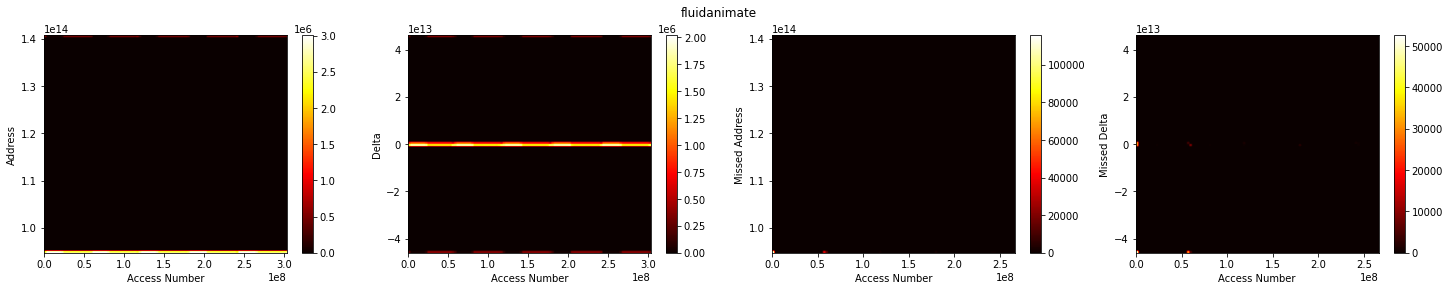

In [8]:
stats('fluidanimate')

,raw,miss
len,6.856194e+08,1.126199e+06
unique addr,1.452524e+07,8.751560e+05
unique deltas,3.382055e+07,1.012932e+06
rare deltas (< 10),2.912907e+07,1.012510e+06
unique deltas (no rare),4.691485e+06,4.220000e+02
rare deltas fract,8.457057e-02,9.236805e-01
deltas 50% mass,8.400000e+01,4.498330e+05
deltas 50K coverage,6.706150e-01,1.449717e-01


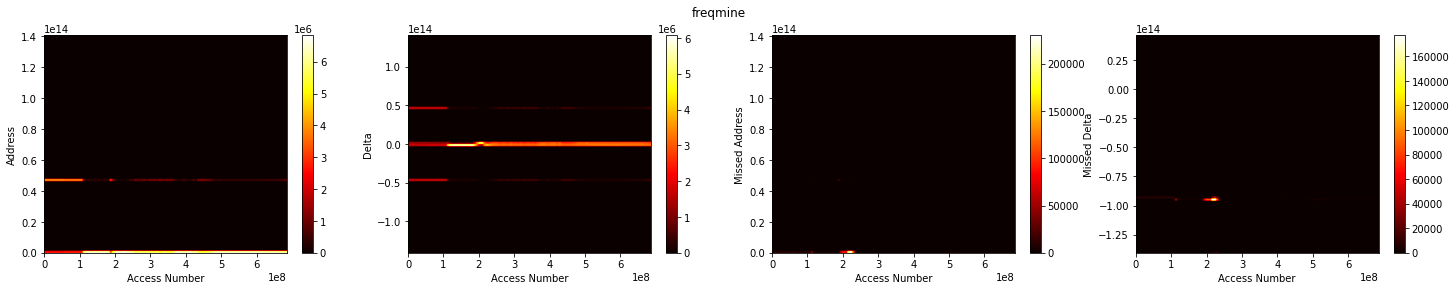

In [9]:
stats('freqmine')

,raw,miss
len,4.160282e+08,352356.000000
unique addr,3.184097e+06,337114.000000
unique deltas,3.604303e+06,325537.000000
rare deltas (< 10),3.542882e+06,325447.000000
unique deltas (no rare),6.142100e+04,90.000000
rare deltas fract,1.883392e-02,0.980542
deltas 50% mass,2.900000e+01,149359.000000
deltas 50K coverage,9.808916e-01,0.218015


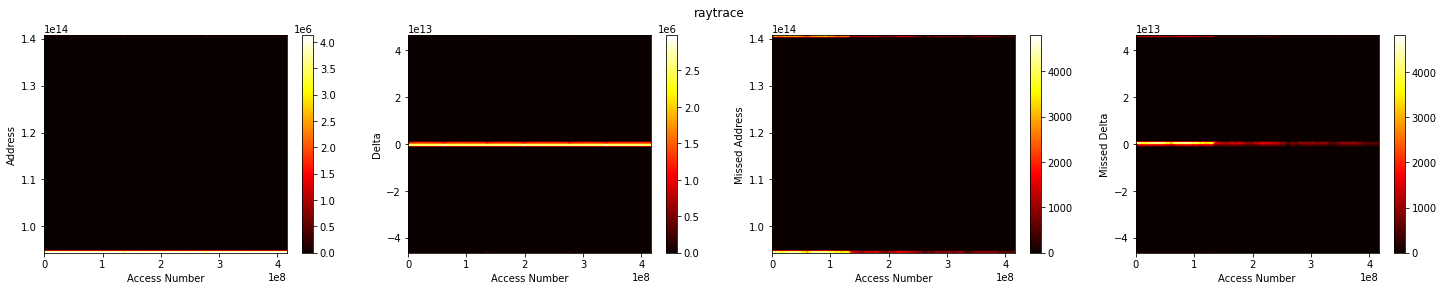

In [10]:
stats('raytrace')

,raw,miss
len,4.512756e+08,11456.000000
unique addr,1.663910e+05,11456.000000
unique deltas,4.228110e+05,8749.000000
rare deltas (< 10),2.698970e+05,8745.000000
unique deltas (no rare),1.529140e+05,4.000000
rare deltas fract,1.016727e-03,0.765538
deltas 50% mass,6.545000e+03,3021.000000
deltas 50K coverage,9.166531e-01,1.000000


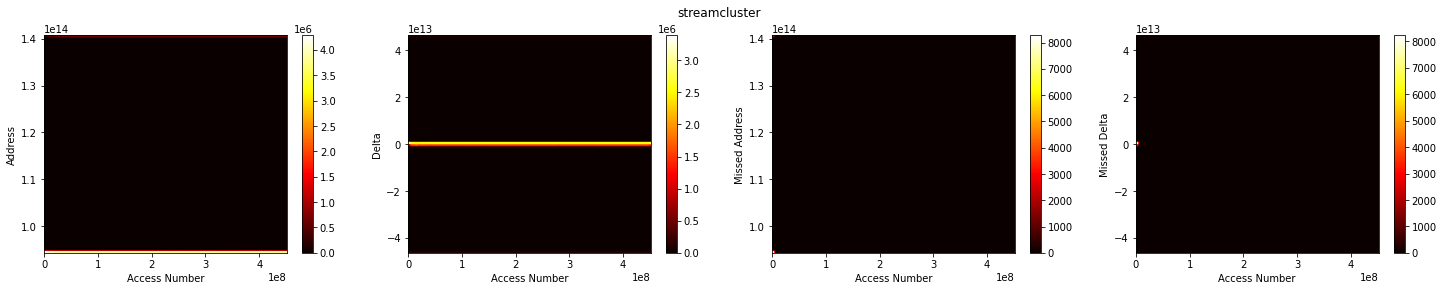

In [11]:
stats('streamcluster')

,raw,miss
len,6.176676e+08,6347.00000
unique addr,4.927300e+04,6347.00000
unique deltas,7.862600e+04,3028.00000
rare deltas (< 10),3.454000e+03,3005.00000
unique deltas (no rare),7.517200e+04,23.00000
rare deltas fract,8.706949e-06,0.73452
deltas 50% mass,6.700000e+01,254.00000
deltas 50K coverage,9.801034e-01,1.00000


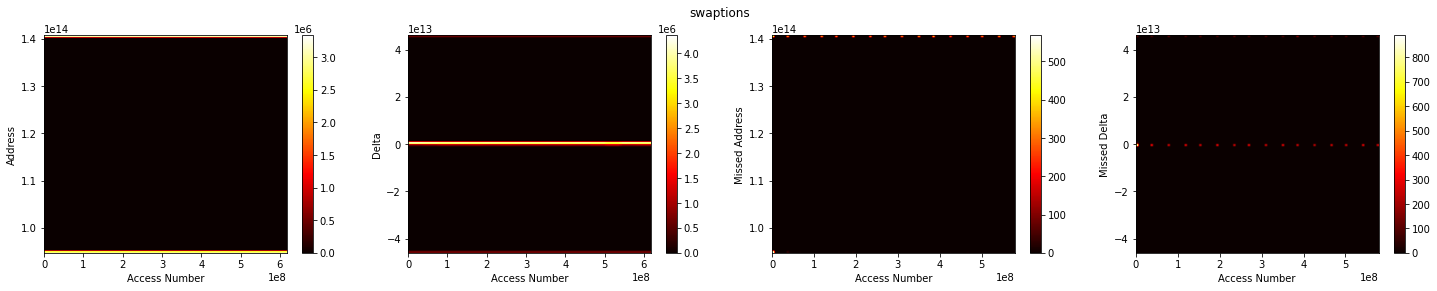

In [12]:
stats('swaptions')

,raw,miss
len,9.912752e+08,141348.000000
unique addr,8.028878e+06,141348.000000
unique deltas,1.451762e+07,130001.000000
rare deltas (< 10),1.287697e+07,129971.000000
unique deltas (no rare),1.640648e+06,30.000000
rare deltas fract,3.338608e-02,0.931743
deltas 50% mass,8.200000e+01,59327.000000
deltas 50K coverage,7.076606e-01,0.434014


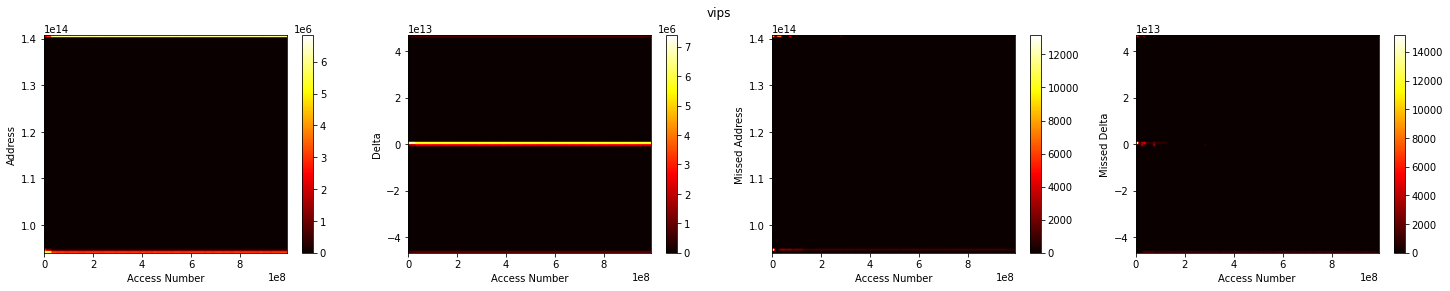

In [13]:
stats('vips')

,raw,miss
len,2.234599e+08,152406.000000
unique addr,3.702729e+06,152406.000000
unique deltas,6.126425e+06,14390.000000
rare deltas (< 10),5.641851e+06,13940.000000
unique deltas (no rare),4.845740e+05,450.000000
rare deltas fract,6.750275e-02,0.114694
deltas 50% mass,1.480000e+02,3.000000
deltas 50K coverage,9.010589e-01,1.000000


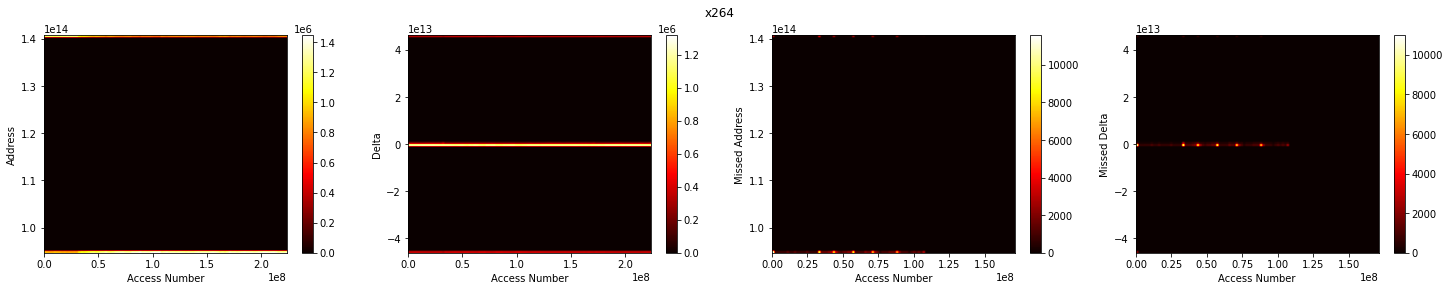

In [14]:
stats('x264')